#0.tensorflow_version 2.x 

In [ ]:
%tensorflow_version 2.x  

In [ ]:
import tensorflow as tf
tf.__version__ 

'2.4.1'

#1.資料預處理Cifar CNN

In [ ]:
#1.資料預處理Cifar CNN

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= cifar10.load_data()

In [ ]:
y_train_label=y_train_label.reshape(-1)
y_test_label=y_test_label.reshape(-1)

In [ ]:
x_train_normalize = x_train_image.astype('float32') / 255.0
x_test_normalize = x_test_image.astype('float32') / 255.0

In [ ]:
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_train_label)
y_test_onehot = utils.to_categorical(y_test_label)

In [ ]:
print("train data:",'images:',x_train_normalize.shape," labels:",y_train_onehot.shape) 
print("test  data:",'images:',x_test_normalize.shape ," labels:",y_test_onehot.shape) 

In [ ]:
class_names =["airplane","automobile","bird","cat","deer",
       "dog","frog","horse","ship","truck"]

#2.建立模型Cifar CNN Sequential API

In [ ]:
#2.建立模型Cifar CNN Sequential API

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense
from tensorflow.keras.layers import Activation,Flatten

In [ ]:
def create_model():
  model = Sequential()
  model.add(Conv2D(
      filters=32,kernel_size=(3,3),input_shape=(32, 32,3),
      activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(
      filters=64, kernel_size=(3, 3),
      activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
model = create_model()

In [ ]:
print(model.summary())

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

#2.建立模型Cifar CNN Functional API

In [ ]:
#2.建立模型Cifar CNN Functional API

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras import Input
from tensorflow.keras import Model

In [ ]:
inputs = Input(shape=(32, 32, 3), name='input_layer')

x = Conv2D(filters=32,kernel_size=(3,3),
           input_shape=(32, 32,3), 
           activation='relu',padding='same')(inputs)

x = MaxPooling2D(pool_size=(2, 2))(x)

x=Conv2D(filters=64, kernel_size=(3, 3), 
         activation='relu', padding='same')(x)

x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)

outputs = Dense(10, activation='softmax')(x)

In [ ]:
model =Model(inputs,outputs,name='CifarCNNFunc')

In [ ]:
print(model.summary())

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

#2.建立模型Cifar CNN SubClass API

In [ ]:
#2.建立模型Cifar CNN SubClass API

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,MaxPooling2D
from tensorflow.keras.layers import Flatten,Conv2D,Softmax
from tensorflow.keras import Input,Model

In [ ]:
class CNN_Model(tf.keras.Model):
  def __init__(self):
    super(CNN_Model, self).__init__(name='CNN_Model')
    self.conv1 = Conv2D(filters=32, kernel_size=(5,5),
                        padding='same',activation='relu')
    self.max_pool1 = MaxPooling2D(pool_size=(2, 2))
    self.conv2 = Conv2D(filters=64, kernel_size=(5,5),
                        padding='same',activation='relu')
    self.max_pool2 = MaxPooling2D(pool_size=(2, 2))
    self.flatten = Flatten()
    self.fc1 = Dense(750, activation='relu')
    self.dropout = Dropout(0.5)
    self.out_layer = Dense(10)
    self.softmax = Softmax()
  def call(self, x):
    x = self.conv1(x)  
    x = self.max_pool1(x)
    x = self.conv2(x)      
    x = self.max_pool2(x)
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.dropout(x)
    x = self.out_layer(x)
    x = self.softmax(x)
    return x


In [ ]:
model = CNN_Model()

In [ ]:
model.build(input_shape=(None, 32,32,3))

In [ ]:
print(model.summary())

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

#3.訓練模型

In [ ]:
#3.訓練模型

In [ ]:
model.compile(
    metrics=['acc'],optimizer='adam',
    loss='categorical_crossentropy')

In [ ]:
train_history=model.fit(
    x=x_train_normalize,y=y_train_onehot,validation_split=0.2,
    batch_size=200,epochs=10,verbose=2)

#4.判斷模型的訓練結果

In [ ]:
#4.判斷模型的訓練結果

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
show_train_history(train_history,'acc','val_acc')

In [ ]:
show_train_history(train_history,'loss','val_loss') 

#5.測試模型

In [ ]:
#5.測試模型

In [ ]:
scores = model.evaluate(x_test_normalize, y_test_onehot)

In [ ]:
print('test_loss=',scores[0],'test_acc=',scores[1])

#6.進行預測

In [ ]:
#6.進行預測

In [ ]:
probability = model.predict(x_test_normalize)

In [ ]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [ ]:
prediction

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
      5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [ ]:
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= str(idx)+',' +label_dict[labels[idx]]
        if len(prediction)>0:
            title+="=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

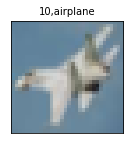

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              [],idx=10,num=1)

In [ ]:
def show_predicted_probability(
    images,labels,prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary') 
  plt.show()
  if len(labels)>0:print('label:',label_dict[labels[idx]])
  if len(prediction)>0:print('predict:',label_dict[prediction[idx]])
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))     

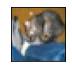

label: cat
predict: cat
airplane   Probability:0.001386953
automobile Probability:0.000272189
bird       Probability:0.000744256
cat        Probability:0.483526975
deer       Probability:0.003503309
dog        Probability:0.470371395
frog       Probability:0.002970411
horse      Probability:0.002049292
ship       Probability:0.031965651
truck      Probability:0.003209557


In [ ]:
show_predicted_probability(x_test_image,y_test_label,
                           prediction,probability,0) 

In [ ]:
#顯示Cifar-10 heatmap_confusion_matrix

In [ ]:
class_names =["airplane","automobile","bird","cat","deer",
              "dog","frog","horse","ship","truck"]
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def plot_heatmap_confusion_matrix(cm_np):
  cm_norm = np.around(
      cm_np.astype('float') / 
      cm_np.sum(axis=1)[:, np.newaxis],decimals=3)
  cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)
  figure = plt.figure(figsize=(8, 6))
  plt.tight_layout();sns.set(font_scale=1)
  plt.ylabel('Label');plt.xlabel('Predicted')
  sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
  return figure

In [ ]:
import pandas as pd

In [ ]:
cm=pd.crosstab(index=y_test_label,columns=prediction,
       rownames=['label'],colnames=['predict'])

In [ ]:
figure = plot_heatmap_confusion_matrix(cm.to_numpy())

#7.儲存模型至gdriver

In [ ]:
#7. 儲存模型至gdriver

In [ ]:
MODEL_NAME='CifarCNN/'

In [ ]:
def has_config(model):
  try:
    model.get_config()
    return True
  except:
    return False

In [ ]:
has_config(model)

True

In [ ]:
import os
def save_model_to_gdrive(model_dir,model_name): 
  path= model_dir+model_name
  if not os.path.exists(model_dir):os.makedirs(model_dir) 
  if not os.path.exists(path):os.makedirs(path) 
  if has_config(model):  
    model_json = model.to_json()  
    with open(path+"structure.json","w") as json_file:
      json_file.write(model_json)
    model.save(path+"whole.h5",save_format='h5')
  model.save(path+"SavedModel",save_format='tf')  
  model.save_weights(path+"weight.h5")   
  from google.colab import drive 
  drive.mount('/content/drive') 
  os.system("cp -r Model '/content/drive/My Drive'")   

In [ ]:
save_model_to_gdrive(model_dir='Model/',model_name=MODEL_NAME)

INFO:tensorflow:Assets written to: Model/CifarCNN/SavedModel/assets
Mounted at /content/drive


In [ ]:
ls -l '/content/drive/My Drive/Model/'

total 12
drwx------ 3 root root 4096 Jan  4 01:05 CifarCNN/
drwx------ 2 root root 4096 Jan  2 07:48 CifarCNNFunc/
drwx------ 2 root root 4096 Jul 25 09:07 CifarCNNSub/


In [ ]:
ls -l Model/$MODEL_NAME

total 8588
drwxr-xr-x 4 root root    4096 Jan  4 01:04 SavedModel/
-rw-r--r-- 1 root root    2777 Jan  4 01:04 structure.json
-rw-r--r-- 1 root root 2200568 Jan  4 01:04 weight.h5
-rw-r--r-- 1 root root 6581768 Jan  4 01:04 whole.h5
